<a href="https://colab.research.google.com/github/RamanGupta16/ML/blob/master/EVA_Ph1/Session4/Session4_3rd_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Session4 3rd DNN 
# Additions on top of 2nd DNN
# 1. Batch Normalization
# 2. Dropout

# Modifications on top of 2nd DNN
# 4. Epochs=30

# Reduced parameters to 14,692
# Batch Size is same 128

# RESULTS SUMMARY
# Parameters: 14,692
# final 99.53 best validation accuracy in epoch 21

In [0]:
# Comments:
# Install keras onto colab VM 
# Import numpy package
# Import keras models, layers, convolution, dropout
# Import MNIST dataset
#

# https://keras.io/
!pip install -q keras

import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(60000, 28, 28)


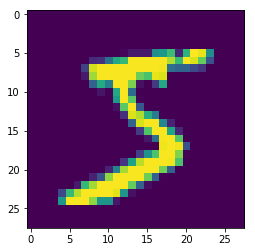

In [45]:
# Comments:
# 1. Load MNIST dataset. It loads both Training and Test datasets
# 2. Training set has 60,000 image samples. X_train are images and y_train is label of images
# 3. Test set of 10,000 image samples. y_test are images and y_train is label of images
# 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Comments:
# 1. Training set has 60,000 image samples of size 28x28 pixels
# 2. Show '5' hand written digit image
#
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Comments:
# 1. Reshape the 60,000 training data with channel dimenison as 1. So each image is 28x28x1 dimension
# 2. Reshape the 10,000 test data with channel dimenison as 1. So each image is 28x28x1 dimension
#

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Comments:
# 1. Divide training data by 255 so that pixels become float values betwee 0..1
# 2. Divide test data by 255 so that pixels become float values betwee 0..1
#

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
# Comments:
# 1. Print the first 10 labels of training data
#
y_train[:10]

# Comments:
# 1. Convert 1-dimensional train and test labels into one-hot vector of floats
#    where only 1 value in vector is high(hot) indicating the label of image.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Comments:
# 1. Print the first 10 training label as one-hot vectors.
#    Eaxmple [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] ==> 5

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
# Comments:
# 1. Create the model
# 2. Add convolution Layers


from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26, RF 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #  24x24, 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu')) #  22x22, 7x7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11, 14x14

model.add(Convolution2D(12, 1, 1, activation='relu')) # 11x11, 14x14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9, 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu')) # 7x7, 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) # 7x7, 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu')) # 5x5, 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 3x3, 22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3)) # 1x1x10, 24x24

model.add(Flatten())
model.add(Activation('softmax'))

# Summarize the model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` cal

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_177 (Conv2D)          (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_158 (Bat (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_149 (Dropout)        (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 24, 24, 16)        1744      
_________________________________________________________________
batch_normalization_159 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_150 (Dropout)        (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 22, 22, 20)        2900      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


In [0]:
# Comment
# 1. Compile the model and define loss function, optimization and metrics to measure the prediction

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [59]:
# Comments:
# 1. Train the model for 10 epochs with 32 batch size

model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
  128/60000 [..............................] - ETA: 1:09 - loss: 0.0340 - acc: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 9s 154us/step - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0171 - val_acc: 0.9941
Epoch 2/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0207 - val_acc: 0.9943
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.0223 - acc: 0.9929 - val_loss: 0.0212 - val_acc: 0.9941
Epoch 4/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0196 - val_acc: 0.9940
Epoch 5/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.0235 - acc: 0.9926 - val_loss: 0.0227 - val_acc: 0.9938
Epoch 6/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.0202 - val_acc: 0.9939
Epoch 7/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.0208 - acc: 0.9937 - val_loss: 0.0199 - val_acc: 0.9935
Epoch 8/30
60000/60000 [====================

In [60]:
# Comments:
# 1. Evaluate the trained model on test dataset
# 2. Print evaluated validation accuracy score.

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022872629069007236, 0.994]


In [0]:
# Comments:
# 1. Generate the predictions for the test dataset.
# 2. These predictions are in 1-hot vector format
#

y_pred = model.predict(X_test)

In [0]:
# Comments:
# 1. Print the first 9 Predictions
# 2. Only prediction for digit 4 are correct rest are wrong.
# 3. Correct predictions for digit 4:
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#    [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
#

print(y_pred[:9])
print(y_test[:9])

[[9.97321048e-25 2.72545078e-19 3.82780575e-17 4.27028367e-13
  1.20464932e-21 3.53642290e-21 3.38389785e-38 1.00000000e+00
  2.52554255e-16 9.41986442e-15]
 [1.83187220e-16 7.23960171e-12 1.00000000e+00 4.40836994e-23
  4.33948279e-21 1.51402853e-26 1.25358396e-13 1.68033354e-17
  6.75671723e-16 2.79559054e-27]
 [1.77510511e-16 1.00000000e+00 1.60574218e-13 5.00236493e-19
  7.73630563e-13 2.69729161e-12 7.41907582e-16 7.60496605e-14
  1.54298935e-11 2.87734789e-16]
 [1.00000000e+00 5.74051384e-27 2.98569457e-18 1.80067473e-15
  1.09145165e-16 1.15624296e-15 4.73020512e-11 6.38265584e-15
  1.36903038e-14 8.90192850e-11]
 [2.83428143e-18 1.64630914e-21 4.70326374e-21 7.23295224e-26
  1.00000000e+00 2.56384215e-12 1.47979485e-14 6.90936599e-20
  3.51728684e-16 4.07468681e-09]
 [2.76913227e-18 1.00000000e+00 1.61837471e-15 4.14958668e-21
  7.92851299e-14 4.03389870e-15 1.96197762e-17 2.34753975e-13
  5.66584843e-12 9.02531638e-18]
 [3.04004648e-24 5.06800734e-15 6.30410677e-16 1.43646234e

In [61]:
# Comment
# Create Layer dictionary

layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_177': <keras.layers.convolutional.Conv2D object at 0x7fe734c1a518>, 'batch_normalization_158': <keras.layers.normalization.BatchNormalization object at 0x7fe734c1a5c0>, 'dropout_149': <keras.layers.core.Dropout object at 0x7fe736bcc0b8>, 'conv2d_178': <keras.layers.convolutional.Conv2D object at 0x7fe736bcc5f8>, 'batch_normalization_159': <keras.layers.normalization.BatchNormalization object at 0x7fe734c1a828>, 'dropout_150': <keras.layers.core.Dropout object at 0x7fe734af0198>, 'conv2d_179': <keras.layers.convolutional.Conv2D object at 0x7fe734b09358>, 'batch_normalization_160': <keras.layers.normalization.BatchNormalization object at 0x7fe734bf73c8>, 'dropout_151': <keras.layers.core.Dropout object at 0x7fe734a3b208>, 'max_pooling2d_19': <keras.layers.pooling.MaxPooling2D object at 0x7fe734905898>, 'conv2d_180': <keras.layers.convolutional.Conv2D object at 0x7fe734984ba8>, 'batch_normalization_161': <keras.layers.normalization.BatchNormalization object at 0x7fe734905978>, 'd

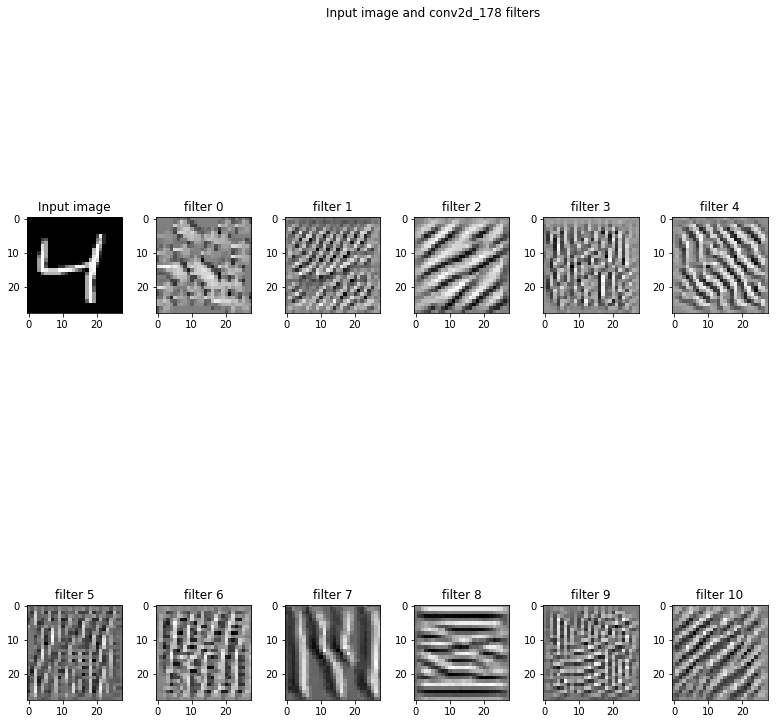

In [65]:
# Comment
# Visualize image in filter

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_178'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()